<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [7]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [9]:
## Write your code here

# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [10]:
## Write your code here
# Display basic information about the dataset
print("Basic Information:")
print(df.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Summary Statistics:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean       

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [17]:
## Write your code here

# Drop duplicate rows
df = df.drop_duplicates()

# Identify columns with missing values
missing_columns = df.isnull().sum()

# Display columns with missing values
missing_columns = missing_columns[missing_columns > 0]
print("Columns with missing values:")
print(missing_columns)

# Recount the number of duplicate rows after dropping them
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows after removal:")
print(duplicate_count)

Columns with missing values:
RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64

Number of duplicate rows after removal:
0


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

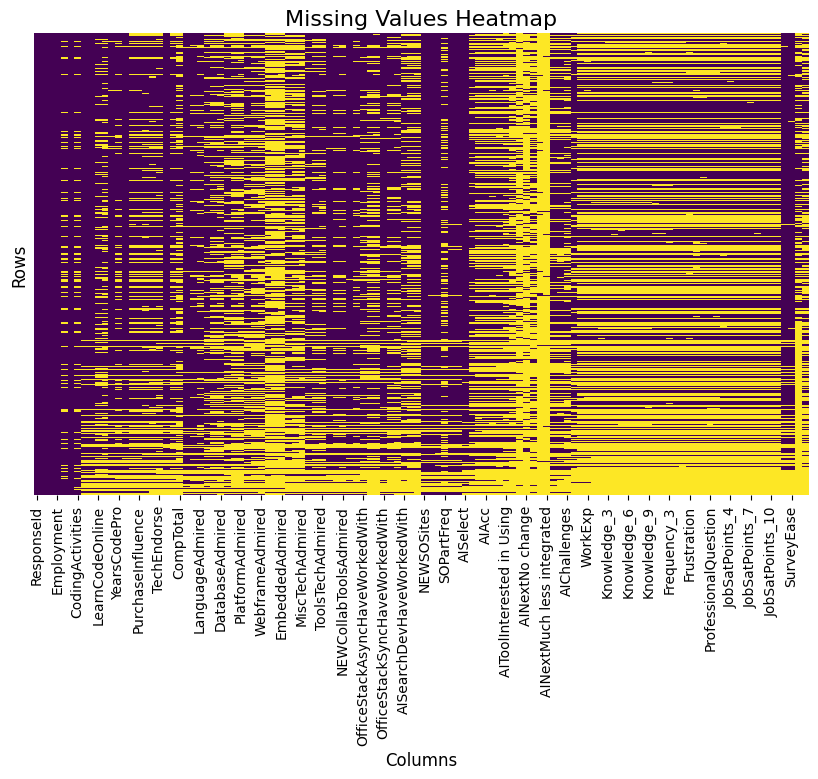

In [19]:
## Write your code here

# Visualize missing values with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)

# Customize the plot
plt.title("Missing Values Heatmap", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [20]:
## Write your code here

# Count number of missing rows for the selected columns
missing_employment = df['Employment'].isnull().sum()
missing_coding_activities = df['CodingActivities'].isnull().sum()
missing_comp_total = df['CompTotal'].isnull().sum()

# print number of missing rows
print(f"Number of missing rows in 'Employment': {missing_employment}")
print(f"Number of missing rows in 'CodingActivities': {missing_coding_activities}")
print(f"Number of missing rows in 'CompTotal': {missing_comp_total}")

Number of missing rows in 'Employment': 0
Number of missing rows in 'CodingActivities': 10971
Number of missing rows in 'CompTotal': 31697


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [21]:
## Write your code here

# Identify the most frequent value for specific columns
employment_mode = df['Employment'].mode()[0] if not df['Employment'].mode().empty else None
coding_activities_mode = df['CodingActivities'].mode()[0] if not df['CodingActivities'].mode().empty else None
comp_total_mode = df['CompTotal'].mode()[0] if not df['CompTotal'].mode().empty else None

# Print the most frequent values
print(f"Most frequent value in 'Employment': {employment_mode}")
print(f"Most frequent value in 'CodingActivities': {coding_activities_mode}")
print(f"Most frequent value in 'CompTotal': {comp_total_mode}")

Most frequent value in 'Employment': Employed, full-time
Most frequent value in 'CodingActivities': Hobby
Most frequent value in 'CompTotal': 100000.0


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [25]:
## Write your code here

# Identify the most frequent value for each column
employment_mode = df['Employment'].mode()[0] if not df['Employment'].mode().empty else None
coding_activities_mode = df['CodingActivities'].mode()[0] if not df['CodingActivities'].mode().empty else None
comp_total_mode = df['CompTotal'].mode()[0] if not df['CompTotal'].mode().empty else None

# Impute missing values with the most frequent value for each column
if employment_mode is not None:
    df['Employment'].fillna(employment_mode, inplace=True)

if coding_activities_mode is not None:
    df['CodingActivities'].fillna(coding_activities_mode, inplace=True)

if comp_total_mode is not None:
    df['CompTotal'].fillna(comp_total_mode, inplace=True)

# Verify the result for all three columns
print("Missing values after imputation:")
print(f"Employment: {df['Employment'].isnull().sum()}")
print(f"CodingActivities: {df['CodingActivities'].isnull().sum()}")
print(f"CompTotal: {df['CompTotal'].isnull().sum()}")

Missing values after imputation:
Employment: 0
CodingActivities: 0
CompTotal: 0


/tmp/ipykernel_132/3116572290.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(employment_mode, inplace=True)
/tmp/ipykernel_132/3116572290.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


/tmp/ipykernel_132/3248141157.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Employment', data=df, ax=axes[0], palette="Set2")
/tmp/ipykernel_132/3248141157.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CodingActivities', data=df, ax=axes[1], palette="Set2")


ValueError: Maximum allowed size exceeded

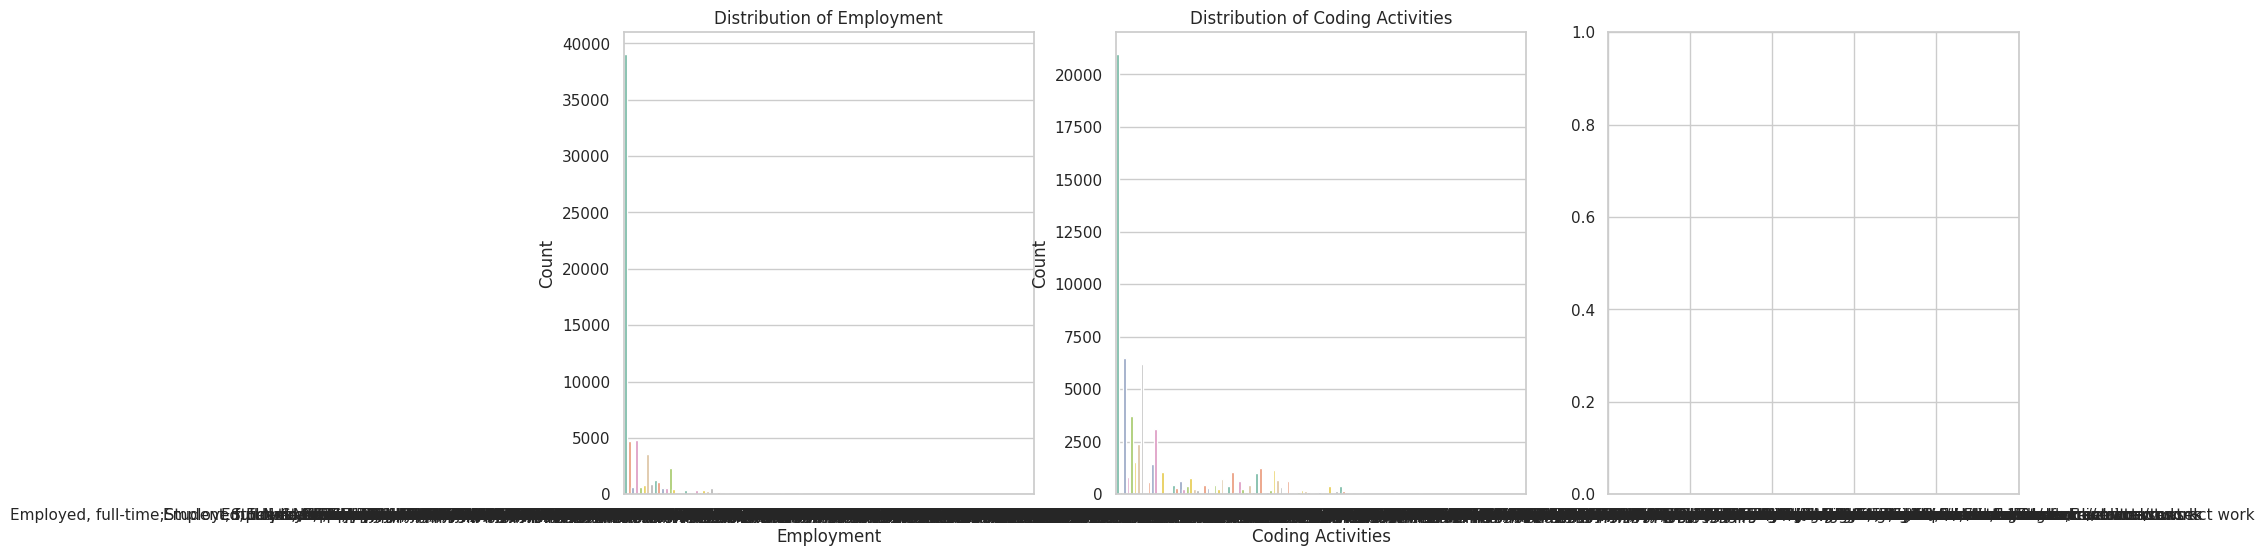

In [26]:
## Write your code here

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot distribution for 'Employment' (categorical data, use a bar plot)
sns.countplot(x='Employment', data=df, ax=axes[0], palette="Set2")
axes[0].set_title('Distribution of Employment')
axes[0].set_xlabel('Employment')
axes[0].set_ylabel('Count')

# Plot distribution for 'CodingActivities' (categorical data, use a bar plot)
sns.countplot(x='CodingActivities', data=df, ax=axes[1], palette="Set2")
axes[1].set_title('Distribution of Coding Activities')
axes[1].set_xlabel('Coding Activities')
axes[1].set_ylabel('Count')

# Plot distribution for 'CompTotal' (numerical data, use a histogram)
sns.histplot(df['CompTotal'], kde=True, ax=axes[2], color='skyblue')
axes[2].set_title('Distribution of CompTotal')
axes[2].set_xlabel('CompTotal')
axes[2].set_ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
